# 선형 회귀

## 데이터

train data와 test data
- train data: 예측을 위해 학습에 사용하는 데이터셋
- test data: 학습 완료 후 모델을 판별하기 위한 데이터셋

모델을 학습하는 데 사용하는 데이터는 pytorch의 텐서 형태여야 합니다

## 가설

머신러닝에서 임의로 추측해서 세워보거나 경험적으로 알고있는 식을 가설이라고 하고 이 가설이 틀리다고 판단되면 계속 수정해나간다

선형 회귀의 가설:
$y = Wx + b$

- 이 때, $W$를 가중치, $b$를 편향이라고 함


## 비용 함수

아래의 용어는 전부 같다
- **비용 함수(cost function)**
- **손실 함수(loss function)**
- 오차 함수(error function)
- 목적 함수(objective function)

2차원 훈련 데이터들이 있고 이 데이터들을 가장 잘 표현하는 직선을 그리는 것이 목표라고 하면 직선과 데이터들의 차이가 생긴다.
이를 오차라고 한다

모든 훈련 데이터에 대해서 오차를 구하고 총 오차를 구하는 방법으로 모든 오차를 합하는 방법을 채택한다고 가정한다

|실제값|예측값|오차|
|--|--|--|
|25|27|-2|
|50|40|10|
|42|53|-9|
|61|66|-5|

모든 오차를 더하면 음수와 양수의 값이 모두 존재하기 때문에 모든 오차가 포함되지 않게 된다.
따라서 오차값을 모두 제곱하고 더하는 방법으로 오차를 구할 수 있는데 이를 평균 제곱 오차(Mean Squared Error, MSE)라고 한다.
이를 함수로 정의해서 값을 최소가 되도록 하는 W와 b를 구하는 과정을 훈련이라고 한다

## 옵티마이저

- 경사하강법

비용 함수의 최솟값을 구하는 데 사용되는 것이 옵티마이저(Optimizer) 알고리즘이다. 최적화 알고리즘이라고도 불리는데 이 알고리즘을 통해 W와 b를 찾아내는 과정을 학습이라고 한다. 가장 기본적인 최적화 알고리즘으로 경사 하강법(Gradient Descent)이 있다.

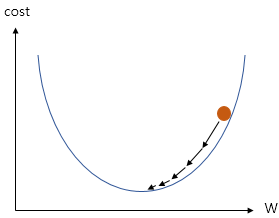

위에서 정의했던 가중치 $W$는 직선에서 기울기라고도 할 수 있다. 이 기울기가 커지거나 작아질수록 cost값은 계속 커진다.

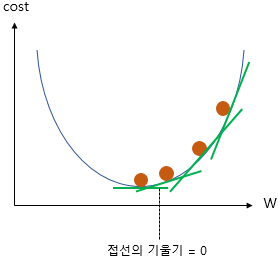

따라서 cost 값이 가장 작은 점을 찾기 위해서 접선의 기울기가 0인 지점을 계속해서 찾아간다. 기울기가 갱신되는 공식은 다음과 같다.

$$W := W - \alpha \times (기울기)$$

- 기울기가 음수일 때

위의 그래프에서 접선의 기울기가 0인 지점의 왼쪽에 존재하므로 W의 값이 증가해야한다.

- 기울기가 양수일 때

위의 그래프에서 접선의 기울기가 0인 지점의 오른쪽에 존재하므로 W의 값이 감소해야한다.

$$W := W - α\frac{∂}{∂W}cost(W)$$

기울기는 cost를 미분한 것과 같으므로 W를 갱신하는 공식은 위와 같이 표현할 수 있다. 이 때 α는 W를 얼마나 변경할지를 결정하는 값으로 **학습률**이라고 한다.

학습률의 값을 조정해줄 때 너무 큰 값을 지정하면 W가 수렴하지 않고 발산하게 되고 너무 작은 값을 지정하면 학습 시간이 오래 걸린다. 

## 파이토치로 선형 회귀 구현

### 모듈 로드 및 기본 설정

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
# 랜덤 시드값 지정
torch.manual_seed(1)

### 변수 선언

In [7]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


### 가중치와 편향 초기화

In [8]:
# requires_grad=True: 이 변수는 학습을 통해 값이 변경된다
W = torch.zeros(1, requires_grad=True)

In [9]:
W

tensor([0.], requires_grad=True)

In [10]:
b = torch.zeros(1, requires_grad=True)

In [11]:
b

tensor([0.], requires_grad=True)

### 가설 설정

In [12]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 비용 함수 선언

In [13]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### 경사 하강법 구현

In [14]:
optimizer = optim.SGD([W, b], lr=0.01)

In [15]:
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

optimizer.zero_grad()를 실행하여 미분을 통해 얻은 기울기를 0으로 초기화.
그 다음 cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산된다. 그 다음 optimizer.step() 함수를 호출해서 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률(0.01)을 적용하여 업데이트한다

In [16]:
W, b

(tensor([0.1867], requires_grad=True), tensor([0.0800], requires_grad=True))

In [17]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

EPOCHS = 1000
LEARNING_RATE = 1e-2

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=LEARNING_RATE)

for epoch in range(1, EPOCHS+1):
    pred = (W * x_train) + b
    cost = torch.mean((pred - y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print(f"epoch: {epoch:3d}/{EPOCHS} | W: {W.item()} | b: {b.item()} | cost: {cost.item()}")

epoch: 100/1000 | W: 1.7450770139694214 | b: 0.5794646143913269 | cost: 0.048402994871139526
epoch: 200/1000 | W: 1.7996175289154053 | b: 0.455516517162323 | cost: 0.029910147190093994
epoch: 300/1000 | W: 1.842481017112732 | b: 0.3580775856971741 | cost: 0.018482649698853493
epoch: 400/1000 | W: 1.8761756420135498 | b: 0.28148165345191956 | cost: 0.011421176604926586
epoch: 500/1000 | W: 1.9026631116867065 | b: 0.22126996517181396 | cost: 0.007057555019855499
epoch: 600/1000 | W: 1.9234843254089355 | b: 0.17393818497657776 | cost: 0.004361126106232405
epoch: 700/1000 | W: 1.9398518800735474 | b: 0.13673122227191925 | cost: 0.0026949176099151373
epoch: 800/1000 | W: 1.952717900276184 | b: 0.10748318582773209 | cost: 0.0016652889316901565
epoch: 900/1000 | W: 1.962831974029541 | b: 0.08449170738458633 | cost: 0.0010290463687852025
epoch: 1000/1000 | W: 1.9707825183868408 | b: 0.06641823798418045 | cost: 0.0006358931423164904


epoch가 반복됨에 따라 최적의 W, b값을 찾아가고 있다.

## optimizer.zero_grad()

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기에 누적시키는 특징이 있다

In [20]:
import torch
w = torch.tensor(2.0, requires_grad=True)

EPOCHS = 20
for epoch in range(1, EPOCHS+1):
    z = 2*w
    z.backward()
    w.grad
    print(f'w로 미분한 값: {w.grad}')

w로 미분한 값: 2.0
w로 미분한 값: 4.0
w로 미분한 값: 6.0
w로 미분한 값: 8.0
w로 미분한 값: 10.0
w로 미분한 값: 12.0
w로 미분한 값: 14.0
w로 미분한 값: 16.0
w로 미분한 값: 18.0
w로 미분한 값: 20.0
w로 미분한 값: 22.0
w로 미분한 값: 24.0
w로 미분한 값: 26.0
w로 미분한 값: 28.0
w로 미분한 값: 30.0
w로 미분한 값: 32.0
w로 미분한 값: 34.0
w로 미분한 값: 36.0
w로 미분한 값: 38.0
w로 미분한 값: 40.0


미분값(w.grad)인 2가 계속 누적되고 있다. 따라서 zero_grad() 함수를 통해 optimizer와 연결된 변수 w의 미분값을 0으로 초기화하고 backward를 통해 미분값을 계산한다.

In [24]:
import torch
import torch.optim as optim

w = torch.tensor(2.0, requires_grad=True)
optimizer = optim.SGD([w], lr=0.01)
EPOCHS = 20
for epoch in range(1, EPOCHS+1):
    z = 2*w
    optimizer.zero_grad()
    z.backward()
    print(f'w로 미분한 값: {w.grad}')

w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0
w로 미분한 값: 2.0


# 자동 미분

requires_grad=True 옵션과 backward 함수 등은 파이토치에서 제공하는 자동 미분을 수행하고 있는 것이다

## 경사하강법

모델이 복잡해질수록 경사 하강법을 numpy 등으로 직접 코딩하는 것은 어렵다. 파이토치에서는 이 때문에 자동 미분을 지원한다

## 자동 미분 실습

In [26]:
import torch

In [43]:
w = torch.tensor(2.0, requires_grad=True)

requires_grad를 True로 설정하면 텐서에 대한 기울기를 저장하겠다는 의미이다. 이렇게 되면 w.grad에 w에 대한 미분값이 저장된다.

In [52]:
# 수식 정의
y = w**2
z = 2*y + 5

In [53]:
z

tensor(13., grad_fn=<AddBackward0>)

In [54]:
z.backward()

In [51]:
print(f'w로 미분한 값: {w.grad}')

w로 미분한 값: 8.0


왜 8이 나올까?

먼저 수식을 w에 대해 미분하면 변화도는 4w이다.
w는 2라는 스칼라 값이므로 4*2 == 8이 된다.

# 다중 선형 회귀

## 데이터 구성

위의 단순 선형회귀와 다르게 독립변수 $x$가 1개가 아닌 2개 이상이다. 예를 들면 다음과 같은 수식이 다음과 같다.
$$ H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b $$

## 파이토치로 구현

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 랜덤 시드 고정
torch.manual_seed(1)

훈련 데이터 선언

In [42]:
x1_train = torch.tensor([[73], [93], [89], [96], [73]])
x2_train = torch.tensor([[80], [88], [91], [98], [66]])
x3_train = torch.tensor([[75], [93], [80], [100], [70]])

In [43]:
y_train = torch.tensor([[152], [185], [180], [196], [142]])

가중치 및 편향 초기화

In [44]:
x1 = torch.zeros(1, requires_grad=True)
x2 = torch.zeros(1, requires_grad=True)
x3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [45]:
optimizer = optim.SGD([x1, x2, x3, b], lr=1e-6)

In [64]:
%%time
EPOCHS = 3000
for epoch in range(1, EPOCHS+1):
    pred = x1 * x1_train + x2 * x2_train + x3 * x3_train + b
    cost = torch.mean((pred - y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch:4d}/{EPOCHS} | cost: {cost}")

epoch:  100/3000 | cost: 5.281927585601807
epoch:  200/3000 | cost: 5.281919956207275
epoch:  300/3000 | cost: 5.281911849975586
epoch:  400/3000 | cost: 5.281905174255371
epoch:  500/3000 | cost: 5.281897068023682
epoch:  600/3000 | cost: 5.281889915466309
epoch:  700/3000 | cost: 5.281883239746094
epoch:  800/3000 | cost: 5.281874656677246
epoch:  900/3000 | cost: 5.281868934631348
epoch: 1000/3000 | cost: 5.2818603515625
epoch: 1100/3000 | cost: 5.281852722167969
epoch: 1200/3000 | cost: 5.281846523284912
epoch: 1300/3000 | cost: 5.281838417053223
epoch: 1400/3000 | cost: 5.281832218170166
epoch: 1500/3000 | cost: 5.281824588775635
epoch: 1600/3000 | cost: 5.28181791305542
epoch: 1700/3000 | cost: 5.281810283660889
epoch: 1800/3000 | cost: 5.281804084777832
epoch: 1900/3000 | cost: 5.281796455383301
epoch: 2000/3000 | cost: 5.281789779663086
epoch: 2100/3000 | cost: 5.281782150268555
epoch: 2200/3000 | cost: 5.281775951385498
epoch: 2300/3000 | cost: 5.281768321990967
epoch: 2400/30

계속 cost가 nan값으로 나왔었는데 learining rate를 1e-5가 아니라 1e-4로 설정했기 때문이다. 학습률이 높아 발산했다고 생각된다.

## 벡터와 행렬 연산으로 변경

위의 학습에서 독립변수의 개수가 3개였기 때문에 데이터와 가중치를 그만큼 설정해주었다. 결국 독립변수가 계속 늘어남에 따라 일일히 설정해야하는 작업이 요구된다. 그 뿐만 아니라 가설(예측값)을 설정하는 계산 또한 그만큼 작성해야하기에 비효율적이다. 
이를 해결하기 위해서 **행렬의 곱셈**(**내적**)을 이용할 수 있다.

## 파이토치로 행렬 연산 구현

In [63]:
%%time
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
W = torch.zeros([3, 1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-5)

EPOCHS = 3000
for epoch in range(1, EPOCHS+1):
    pred = x_train.matmul(W) + b
    cost = torch.mean((pred - y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch:4d}/{EPOCHS} | cost: {cost}")

epoch:  100/3000 | cost: 5.757065773010254
epoch:  200/3000 | cost: 5.514731407165527
epoch:  300/3000 | cost: 5.283929347991943
epoch:  400/3000 | cost: 5.064043045043945
epoch:  500/3000 | cost: 4.8544769287109375
epoch:  600/3000 | cost: 4.6546430587768555
epoch:  700/3000 | cost: 4.464139461517334
epoch:  800/3000 | cost: 4.282410144805908
epoch:  900/3000 | cost: 4.108969211578369
epoch: 1000/3000 | cost: 3.9434783458709717
epoch: 1100/3000 | cost: 3.785430431365967
epoch: 1200/3000 | cost: 3.634531021118164
epoch: 1300/3000 | cost: 3.490398406982422
epoch: 1400/3000 | cost: 3.352675676345825
epoch: 1500/3000 | cost: 3.221024990081787
epoch: 1600/3000 | cost: 3.0951921939849854
epoch: 1700/3000 | cost: 2.9748754501342773
epoch: 1800/3000 | cost: 2.8597991466522217
epoch: 1900/3000 | cost: 2.749729633331299
epoch: 2000/3000 | cost: 2.644376039505005
epoch: 2100/3000 | cost: 2.543553352355957
epoch: 2200/3000 | cost: 2.4470534324645996
epoch: 2300/3000 | cost: 2.3546252250671387
epo

행렬 계산은 식을 간단하게 해주는 것 외에 다수 샘플의 병렬 연산이기 때문에 속도의 이점을 가진다